https://leetcode.com/problems/binary-tree-level-order-traversal/description/

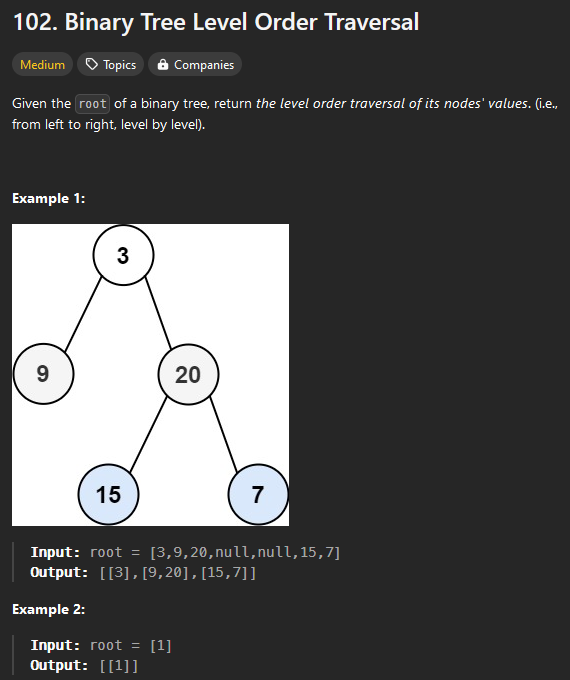

In [1]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def list_to_bin_tree(l):
    if not l:
        return None

    root = Node(l.pop(0))
    queue = [root]

    while queue:
        node = queue.pop(0)

        if l:
            left_val = l.pop(0)
            if left_val != None:
                node.left = Node(left_val)
                queue.append(node.left)

        if l:
            right_val = l.pop(0)
            if right_val != None:
                node.right = Node(right_val)
                queue.append(node.right)

    return root

from collections import deque
def solution(root):
    # Input: root node of the binary tree
    # Output: A list where each element is an array representing a level of the tree
    # Example: For a tree with root 3, children 9 and 20, and further children 15 and 7,
    # the output would be [[3], [9, 20], [15, 7]]

    # We will perform level-order traversal, which is essentially Breadth-First Search (BFS)

    # Initialize an empty list to hold the result (list of levels)
    result = []

    # Initialize a queue with the root node to start BFS
    # The queue will help us process nodes level by level
    queue = deque([root])

    # While there are nodes in the queue to process
    while queue:
        # Initialize an empty list to store the node values for the current level
        curr_level = []

        # Process all nodes at the current level
        # len(queue) gives the number of nodes at the current level
        for _ in range(len(queue)):
            # Pop the first node from the queue (FIFO order for BFS)
            node = queue.popleft()

            # If the node is not None, process it
            if node:
                # Add the node's value to the current level list
                curr_level.append(node.val)

                # Append the node's left and right children to the queue for the next level
                # If the child is None, it will be handled in the next iteration of the loop
                queue.append(node.left)
                queue.append(node.right)

        # After processing all nodes at the current level, add the level to the result
        # Only add the level if it's not empty (curr_level will be empty if all nodes were None)
        if curr_level:
            result.append(curr_level)

    # Return the final result, which is a list of lists, where each sublist represents a level
    return result


def test_solution():

    tests = [
        {"input": [], "output": []},
        {"input": [1], "output": [[1]]},
        {"input": [2, 1], "output": [[2], [1]]},
        {"input": [2, None, 1], "output": [[2], [1]]},
        {"input": [3, 9, 20, None, None, 15, 7], "output": [[3], [9, 20], [15, 7]]},
    ]

    for i in range(len(tests)):
        print(
            "Test",
            i + 1,
            "Pass:",
            solution(list_to_bin_tree(tests[i]["input"])) == tests[i]["output"],
        )

In [2]:
test_solution()

Test 1 Pass: True
Test 2 Pass: True
Test 3 Pass: True
Test 4 Pass: True
Test 5 Pass: True


In [3]:
def recurse_tree(node, result, curr_level=0):
    # Base case: if the current node is None, return
    if not node:
        return

    # If the current level doesn't exist in the result, add a new list for this level
    if len(result) == curr_level:
        result.append([])

    # Append the current node's value to the current level
    result[curr_level].append(node.val)

    # Recur for the left and right child, incrementing the level
    recurse_tree(node.left, result, curr_level + 1)
    recurse_tree(node.right, result, curr_level + 1)


def recursive_solution(root):
    # Edge case: if the tree is empty, return an empty list
    if not root:
        return []

    # Initialize the result list and start recursion
    result = []
    recurse_tree(root, result, 0)

    # Return the final level order traversal result
    return result


def test_solution_r():

    tests = [
        {"input": [], "output": []},
        {"input": [1], "output": [[1]]},
        {"input": [2, 1], "output": [[2], [1]]},
        {"input": [2, None, 1], "output": [[2], [1]]},
        {"input": [3, 9, 20, None, None, 15, 7], "output": [[3], [9, 20], [15, 7]]},
    ]

    for i in range(len(tests)):
        print(
            "Test",
            i + 1,
            "Pass:",
            recursive_solution(list_to_bin_tree(tests[i]["input"]))
            == tests[i]["output"],
        )

In [4]:
test_solution_r()

Test 1 Pass: True
Test 2 Pass: True
Test 3 Pass: True
Test 4 Pass: True
Test 5 Pass: True
